In [15]:
import numpy as np

In [16]:
import random

In [17]:
# The Organism class is used to represent an organism in the game. It has
# the following instance variables:
# - size: the size of the organism
# - _size: the original size of the organism
# - speed: the speed of the organism
# - agility: the agility of the organism
class Organism:
    def __init__(self,size,speed):
        # Initialize instance variables
        self.size = size
        self._size = size
        self.speed = speed
        self.agility = speed*(2/size)

def crossover(p1,p2):
    size = random.choice([p1.size,p2.size])
    speed = random.choice([p1.speed,p2.speed])
    return Organism(size,speed)

def mutate(organism, mutation_rate):
    if random.random() < mutation_rate:
        organism.size += random.randint(-2,5)
    if random.random() < mutation_rate:
        organism.speed += random.randint(-2,5)
    return organism

In [18]:
population_size = 10
population = []

for i in range(population_size):
    size = random.randint(1,100)
    speed = random.randint(1,100)
    organism = Organism(size,speed)
    population.append(organism)

In [19]:
def fitness_function(organism):
    return organism.agility * organism.size * organism.speed

In [20]:
num_generations = 5000

for i in range(population_size):
    size = random.randint(1,100)
    speed = random.randint(1,100)
    organism = Organism(size,speed)
    population.append(organism)
#Genetic Algorithm Loop
for i in range(num_generations):
    fitness_scores = [fitness_function(organism) for organism in population]
    fittest_organism = population[fitness_scores.index(max(fitness_scores))]
    
    #Crossover phase
    new_population = []
    for i in range(population_size):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = crossover(parent1,parent2)
        new_population.append(child)
    
    for organism in new_population:
        mutate(organism,0.1)
    
    population = new_population
    

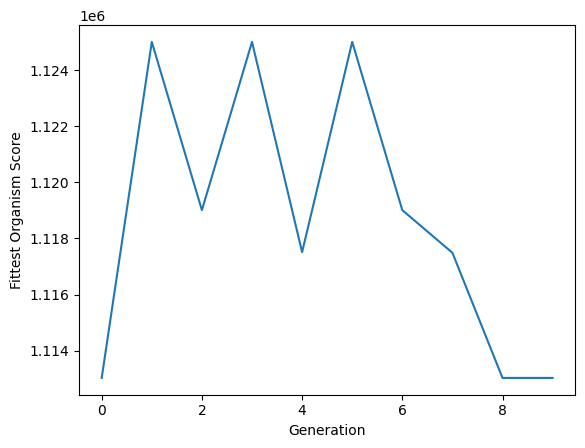

In [21]:
import matplotlib.pyplot as plt

fittest_agilities = []

for i in range(num_generations):
    fittest_organism = sorted(population, key=fitness_function, reverse=True)[0]
    fitness_scores.append(fitness_function(fittest_organism))
    
plt.plot(fitness_scores)
plt.xlabel('Generation')
plt.ylabel('Fittest Organism Score')
plt.show()